In [10]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Seragg 3h\Desktop\Hol\mission5.csv")
df.head(5)

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score,Accepted
0,2.75,1374,5,16,2,9,No
1,3.90,1542,7,27,3,3,Yes
2,3.46,1040,4,29,1,9,No
3,3.20,1363,3,28,2,1,No
4,2.31,895,1,5,1,1,No


In [11]:
df.isna().sum()

GPA                           0
Test Score                    0
Extracurricular Activities    0
Volunteer Hours               0
Recommendation Letters        0
Essay Score                   0
Accepted                      0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
le = LabelEncoder()
df['Accepted'] = le.fit_transform(df['Accepted'])

In [16]:
sc = MinMaxScaler()
x = df.drop('Accepted' , axis = 1)
x = sc.fit_transform(x)

print(x)

[[0.37755102 0.71984925 0.55555556 0.41025641 0.5        0.88888889]
 [0.96428571 0.93090452 0.77777778 0.69230769 1.         0.22222222]
 [0.73979592 0.30025126 0.44444444 0.74358974 0.         0.88888889]
 ...
 [0.96428571 0.93090452 0.77777778 0.69230769 1.         0.22222222]
 [0.87755102 0.70854271 0.22222222 0.64102564 0.         0.88888889]
 [0.61734694 1.         0.66666667 0.41025641 0.5        1.        ]]


In [17]:
df.describe()

,GPA,Test Score,Extracurricular Activities,Volunteer Hours,Recommendation Letters,Essay Score,Accepted
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,2.934460,1250.037000,3.843000,21.66300,1.886000,5.709000,0.50000
std,0.599815,220.805772,2.713985,11.33004,0.796014,2.856655,0.50025
min,2.010000,801.000000,0.000000,0.00000,1.000000,1.000000,0.00000
25%,2.370000,1040.000000,2.000000,14.00000,1.000000,3.000000,0.00000
50%,2.940000,1272.000000,3.000000,24.00000,2.000000,5.000000,0.50000
75%,3.460000,1445.000000,6.000000,31.00000,3.000000,9.000000,1.00000
max,3.970000,1597.000000,9.000000,39.00000,3.000000,10.000000,1.00000


Text(0.5, 1.0, 'Dist')

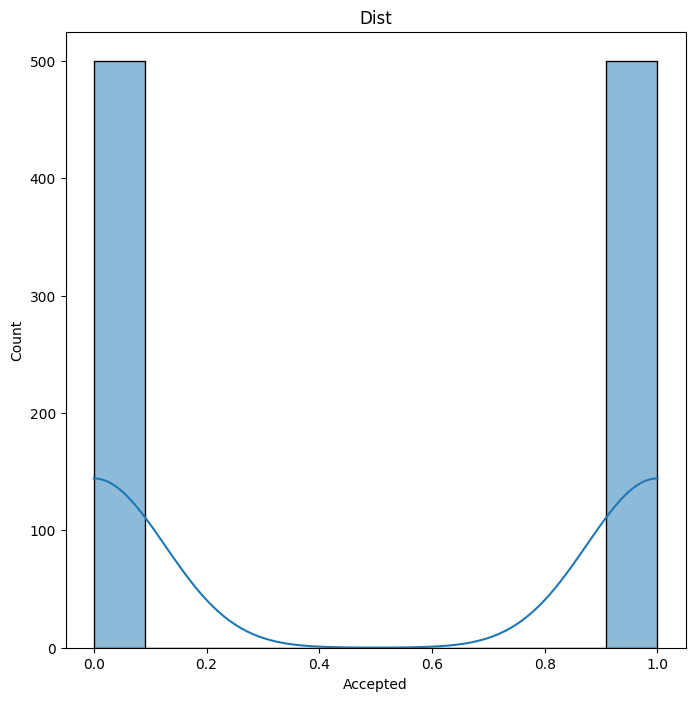

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8,8))
sns.histplot(df['Accepted'], kde=True)
plt.xlabel('Accepted')
plt.title('Dist')

Text(0.5, 1.0, 'Dist')

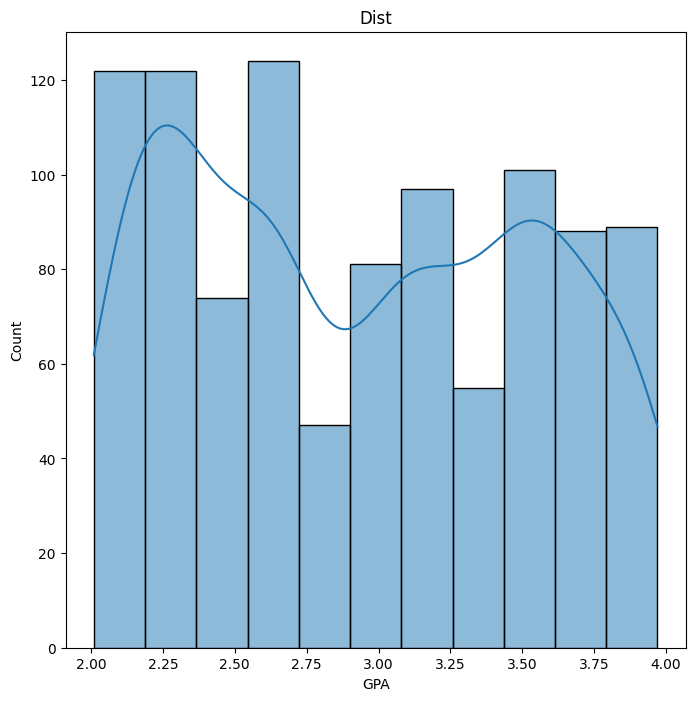

In [19]:
plt.figure(figsize=(8,8))
sns.histplot(df['GPA'], kde=True)
plt.xlabel('GPA')
plt.title('Dist')

Text(0.5, 1.0, 'Dist')

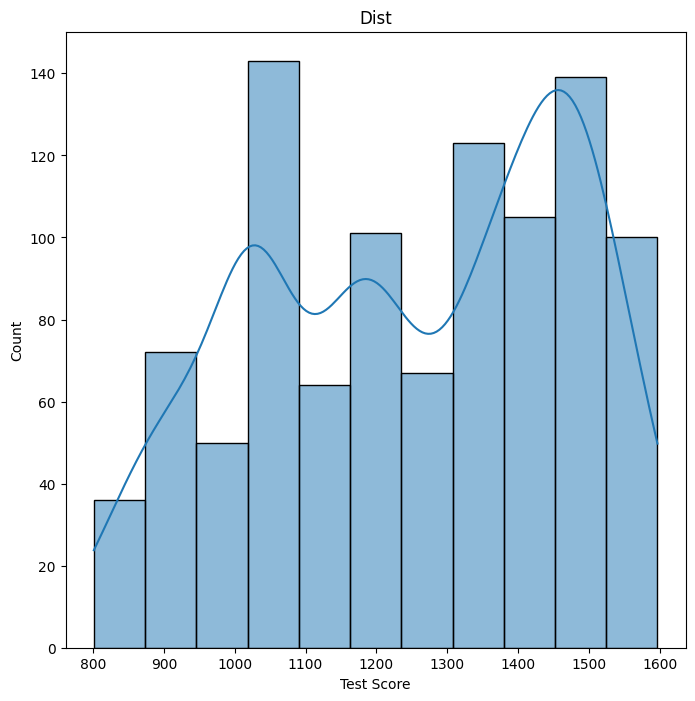

In [20]:
plt.figure(figsize=(8,8))
sns.histplot(df['Test Score'], kde=True)
plt.xlabel('Test Score')
plt.title('Dist')

Text(0.5, 1.0, 'Rel')

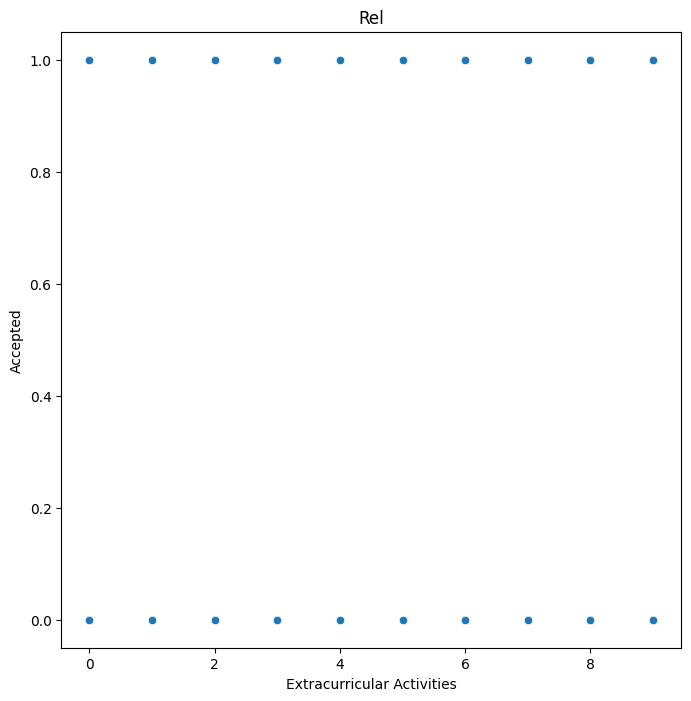

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = 'Extracurricular Activities', y = 'Accepted')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Accepted')
plt.title('Rel')

Text(0.5, 1.0, 'Imp')

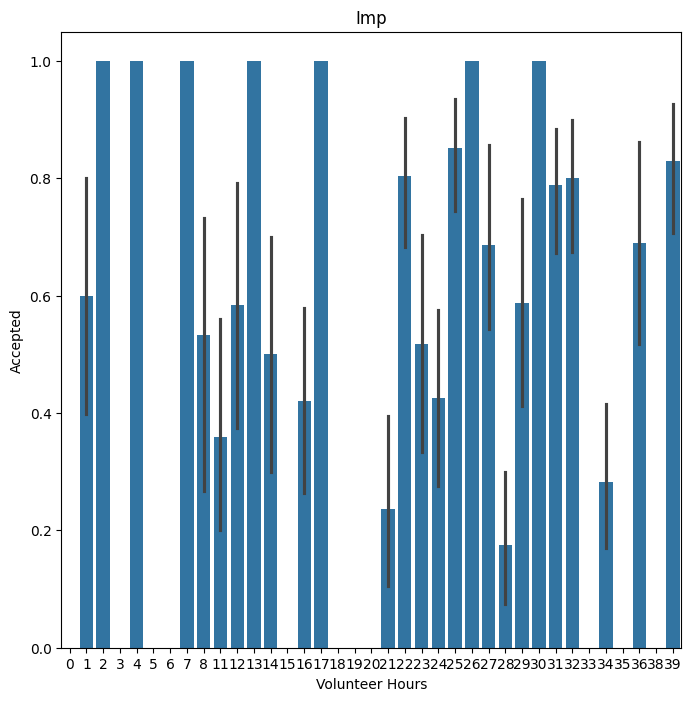

In [23]:
plt.figure(figsize=(8,8))
sns.barplot(data = df, x = 'Volunteer Hours', y = 'Accepted')
plt.xlabel('Volunteer Hours')
plt.ylabel('Accepted')
plt.title('Imp')

Text(0.5, 1.0, 'Imp')

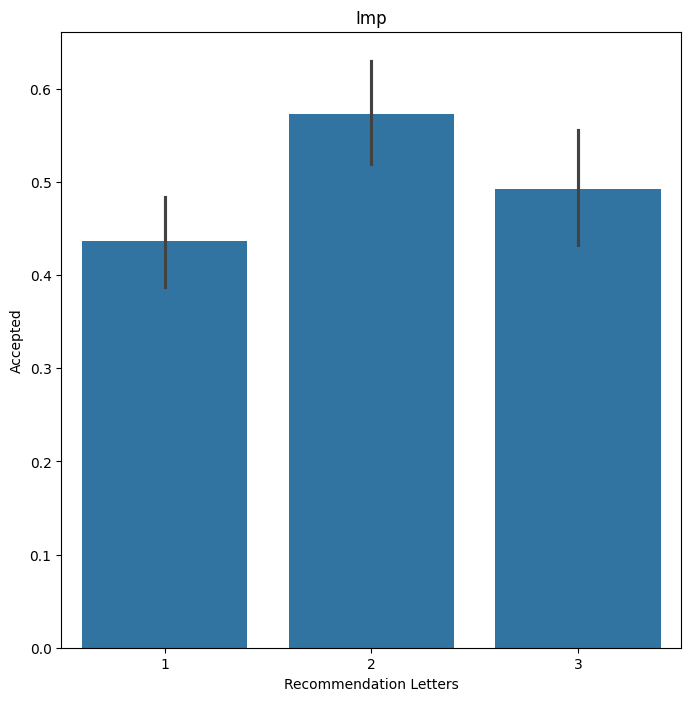

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(data = df, x = 'Recommendation Letters', y = 'Accepted')
plt.xlabel('Recommendation Letters')
plt.ylabel('Accepted')
plt.title('Imp')

In [26]:
y = df['Accepted']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [29]:
lr.fit(x_train , y_train)
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [30]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy score for lr model is: ' , accuracy_score(y_test , y_pred_lr))
print('-'*40)
print(classification_report(y_test , y_pred_lr))
print('-'*40)
print('Confusion matrix for lr model is: ' , confusion_matrix(y_test , y_pred_lr))

Accuracy score for lr model is:  0.64
----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        98
           1       0.66      0.61      0.63       102

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200

----------------------------------------
Confusion matrix for lr model is:  [[66 32]
 [40 62]]


In [36]:
print('Accuracy score for dt model is: ' , accuracy_score(y_test , y_pred_dt))
print('-'*40)
print(classification_report(y_test , y_pred_dt))
print('-'*40)
print('Confusion matrix for dt model is: ' , confusion_matrix(y_test , y_pred_dt))

Accuracy score for dt model is:  1.0
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

----------------------------------------
Confusion matrix for dt model is:  [[ 98   0]
 [  0 102]]


Text(0.5, 1.0, 'Rel')

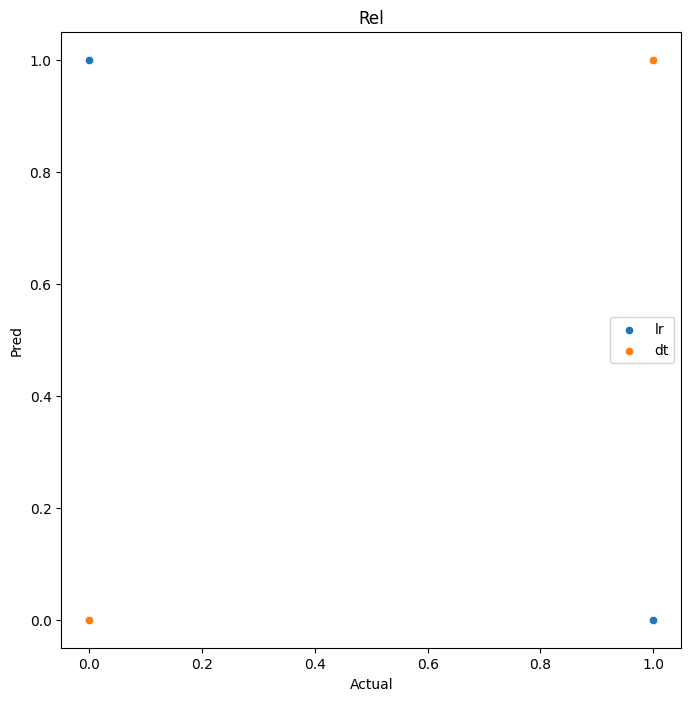

In [40]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = y_pred_lr, label = 'lr')
sns.scatterplot(x = y_test, y = y_pred_dt, label = 'dt')
plt.xlabel('Actual')
plt.ylabel('Pred')
plt.legend()
plt.title('Rel')

In [41]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'max_depth' : [5, 10, 15, 20, 25],
    'max_leaf_nodes' : [5, 10, 15, 20, 25]
}

grid_model = GridSearchCV(dt, grid_params, cv=5)
grid_model.fit(x_train , y_train)
print('Best params' , grid_model.best_params_)

Best params {'max_depth': 15, 'max_leaf_nodes': 25}


In [42]:
y_pred_grid = grid_model.best_estimator_.predict(x_test)

print('Accuracy score for grid model is: ' , accuracy_score(y_test , y_pred_grid))
print('-'*40)
print(classification_report(y_test , y_pred_grid))
print('-'*40)
print('Confusion matrix for grid model is: ' , confusion_matrix(y_test , y_pred_grid))

Accuracy score for grid model is:  1.0
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

----------------------------------------
Confusion matrix for grid model is:  [[ 98   0]
 [  0 102]]


In [44]:
df.columns


Index(['GPA', 'Test Score', 'Extracurricular Activities', 'Volunteer Hours',
       'Recommendation Letters', 'Essay Score', 'Accepted'],
      dtype='object')

In [46]:
import gradio as gr 

def acc_pred(GPA, Ts, Ea, Vh, Rl, Es):
    input_data = pd.DataFrame({
        'GPA' : [GPA],
        'Test Score' : [Ts],
        'Extracurricular Activities' : [Ea],
        'Volunteer Hours' : [Vh],
        'Recommendation Letters' : [Rl],
        'Essay Score' : [Es],
    })
    
    input_data = sc.transform(input_data)
    
    prediction = dt.predict(input_data)
    
    if prediction == 0 : 
        return 'No'
    else:
        return 'Yes'
    
gr.Interface(
    fn= acc_pred,
    inputs=[
        gr.Number(label='GPA'),
        gr.Number(label='Test Score'),
        gr.Number(label='Extracurricular Activities'),
        gr.Number(label='Volunteer Hours'),
        gr.Number(label='Recommendation Letters'),
        gr.Number(label='Essay Score')
    ],
    outputs= gr.Textbox(label= 'The prediction for acceptance: '),
    title= 'Acc pred'
).launch()    

Running on local URL:  http://127.0.0.1:7861

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

To create a public link, set `share=True` in `launch()`.
